# Exploring synthetic data for the regression models

The data will be explored in order to see the distributions, correlations, and other characteristics and relationships that are useful to examine before running the regression models.

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust display settings
pd.set_option("display.max_columns", None)
%matplotlib inline

# Dataset 1:
- total number of samples = 1000
- number of features = 5
- noise (data generation) = 0.1
- train/test split = 80/20
- random state = 50 (both data generation and preprocessing)

In [ ]:
# Load data
train = pd.read_csv("../data/processed/train.csv")
test = pd.read_csv("../data/processed/test.csv")

# Quick checks
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (800, 6)
test shape: (200, 6)


In [ ]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,1.378447,1.135776,-1.783983,-0.766675,-0.813113,118.227813
1,1.208743,1.078056,-0.597496,0.075105,-0.209206,171.760918
2,1.243964,0.192782,-1.585653,-1.589553,0.939195,6.163557
3,0.077302,-1.294351,0.608456,-0.339947,1.257012,-69.860508
4,-0.985010,0.390817,-0.528331,0.176689,-0.228372,-61.206807


In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,800.0,-1.332268e-17,1.000626,-3.539648,-0.590886,0.043751,0.665706,3.149565
feature_2,800.0,1.332268e-17,1.000626,-2.844671,-0.675446,-0.031538,0.694631,3.333455
feature_3,800.0,2.664535e-17,1.000626,-3.345629,-0.628052,0.013357,0.702365,3.074428
feature_4,800.0,-3.552714e-17,1.000626,-2.849225,-0.670071,-0.033879,0.670051,3.083916
feature_5,800.0,-1.043610e-16,1.000626,-3.722470,-0.671967,-0.027922,0.689573,2.791464
target,800.0,3.186511e+00,130.317183,-425.003377,-83.719547,7.269885,95.186295,537.995577


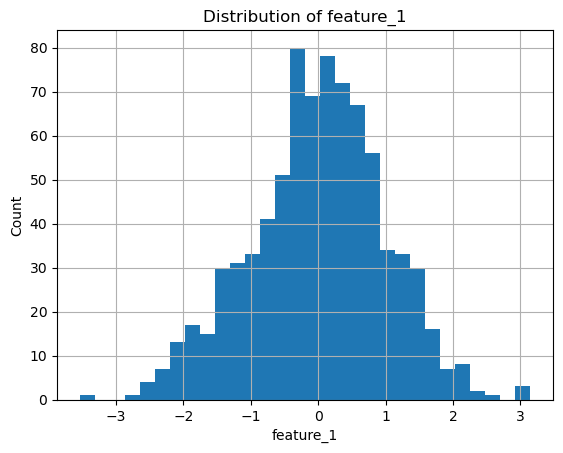

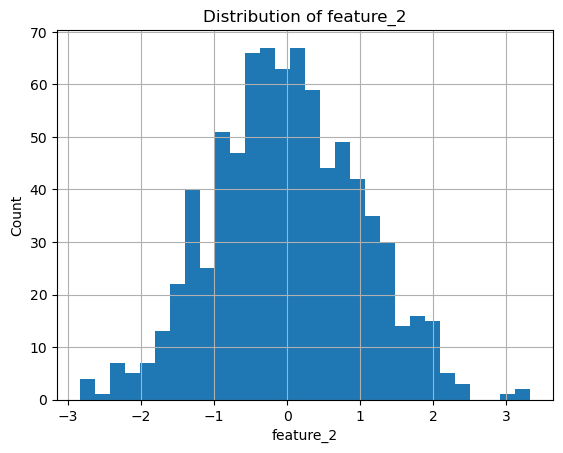

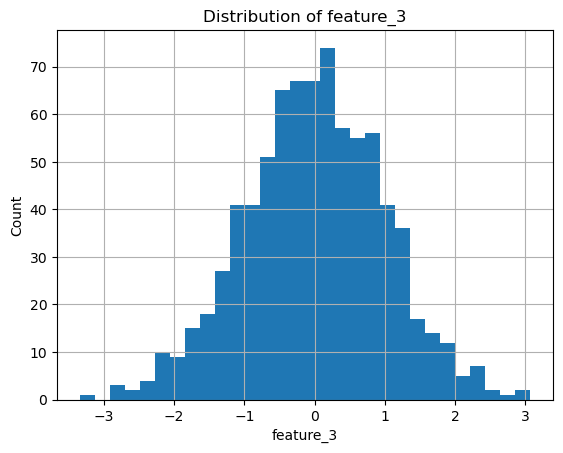

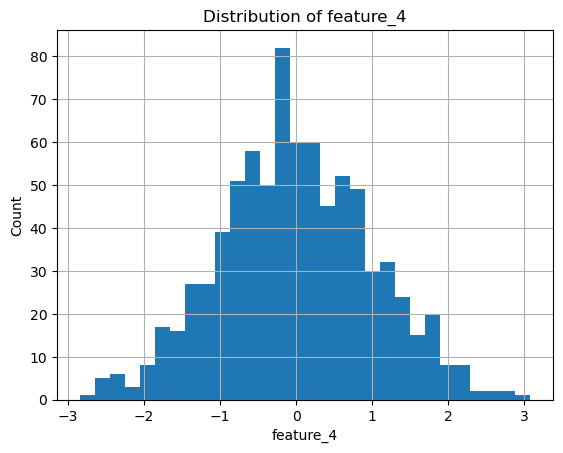

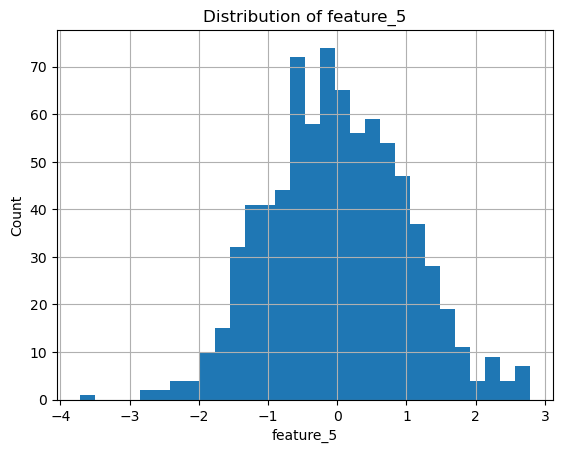

In [ ]:
# Histograms - features

for col in train.columns[: -1]:
    plt.figure()
    train[col].hist(bins= 30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.show()

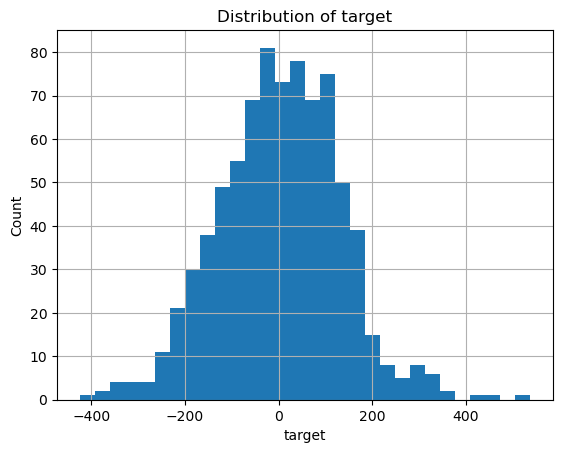

In [ ]:
# Histogram - target

plt.figure()
train["target"].hist(bins= 30)
plt.title("Distribution of target")
plt.xlabel("target")
plt.ylabel("Count")
plt.show()

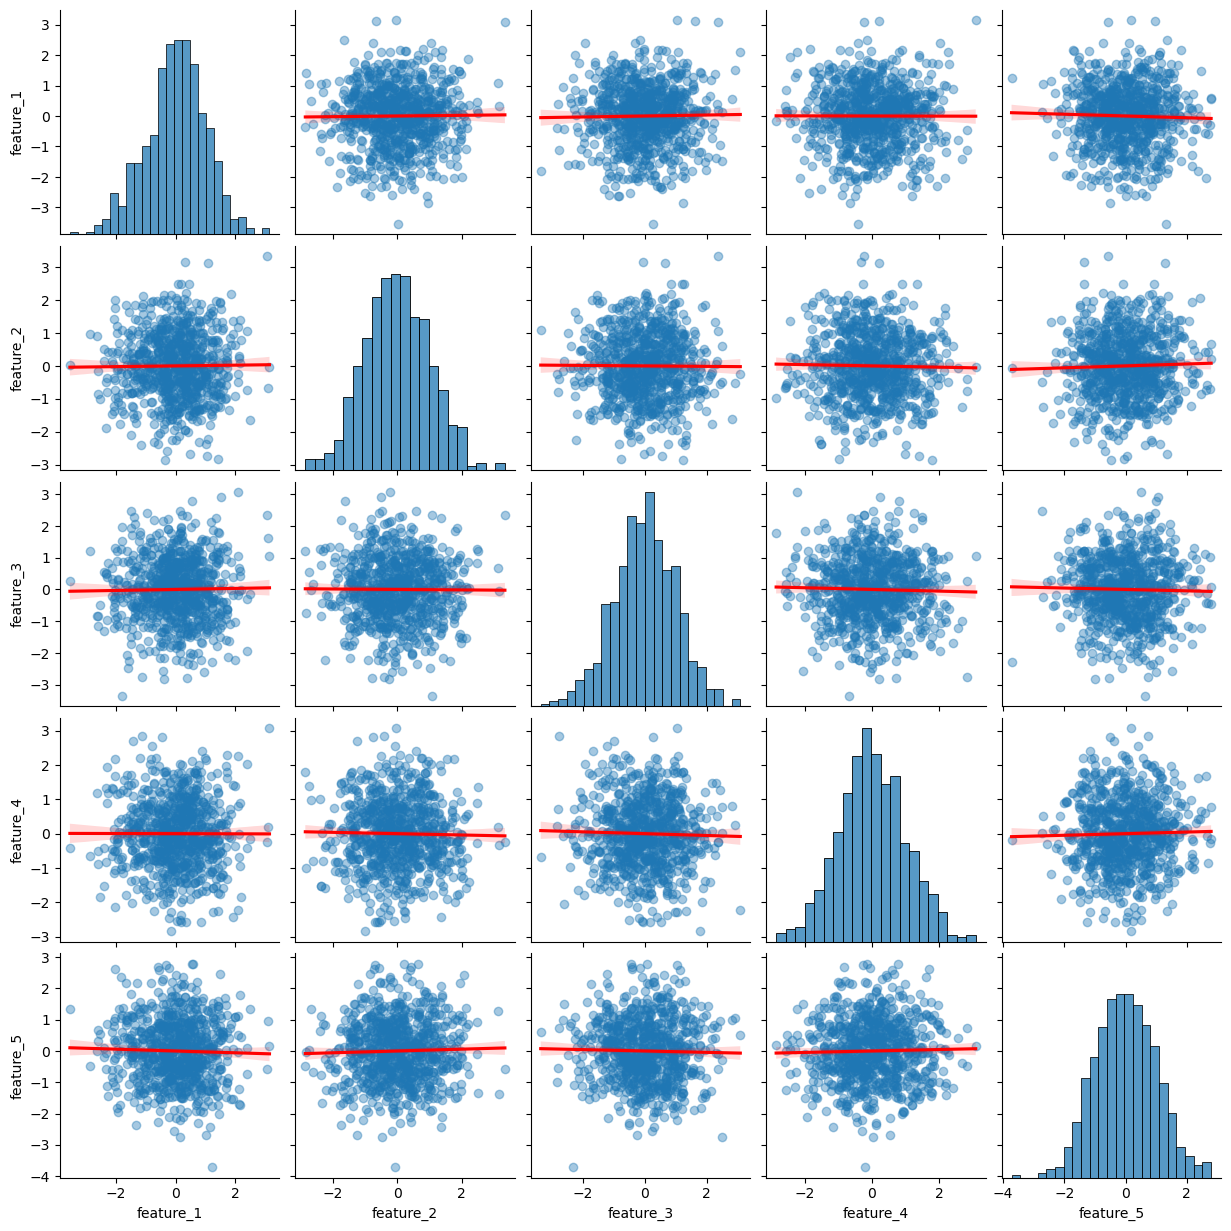

In [ ]:
# Pairwise relationships scatterplot matrix - features

sns.pairplot(
    train.iloc[: , : 5],
    kind= "reg",
    plot_kws= {"line_kws": {"color": "red"}, "scatter_kws": {"alpha": 0.4}}
)
plt.show()

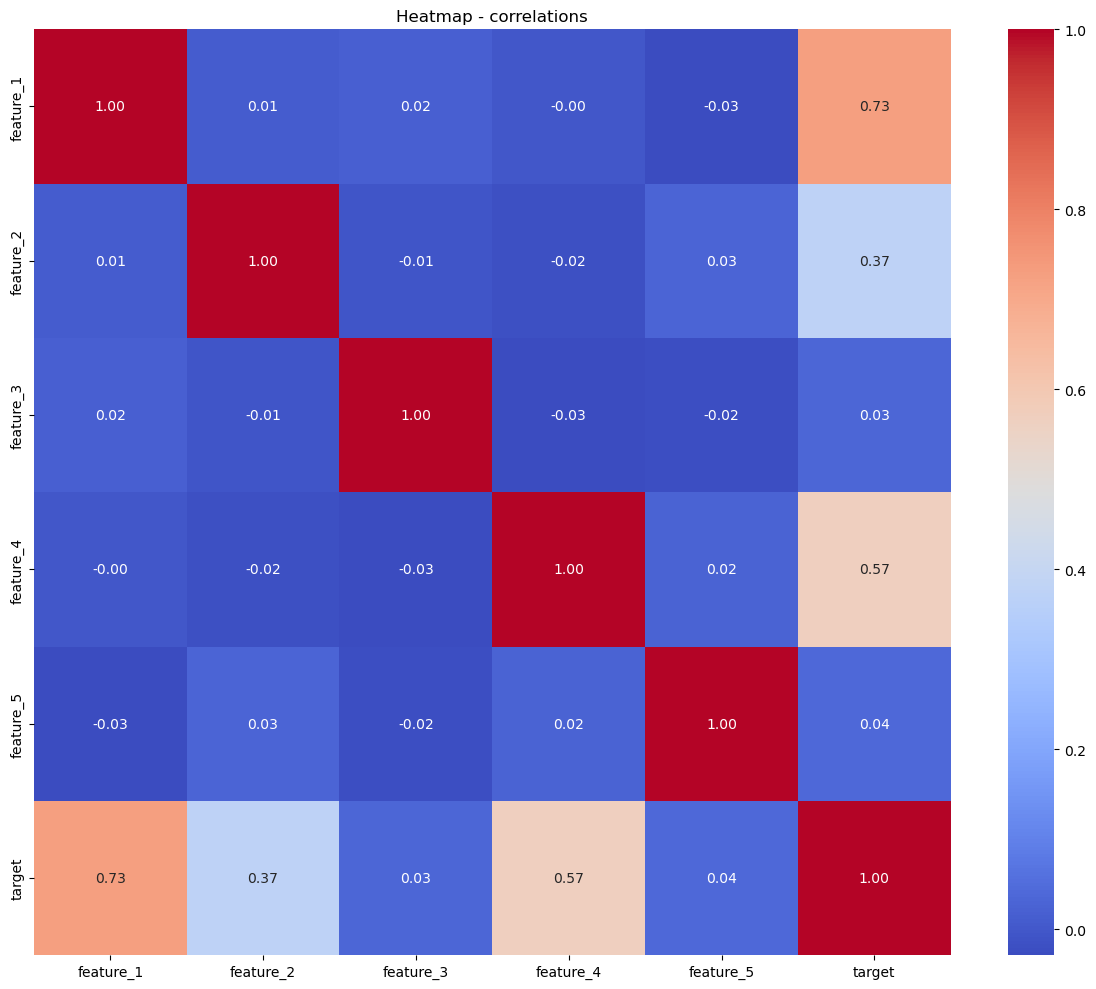

In [ ]:
# Correlations

corr_matrix = train.corr()
plt.figure(figsize= (12, 10))
sns.heatmap(corr_matrix, annot= True, fmt= ".2f", cmap= "coolwarm")
plt.title("Heatmap - correlations")
plt.tight_layout()
plt.show()